### Uses
1. medical diagnosis
2. self-driving vehicles
3. camera monitoring
4. smart filters

##### Deep Learning has been the transformative power for advancing the performance of computer vision systems.

#### Image augmentation generates similar but distinct training examples after a series of random changes to the training images, thereby expanding the size of the training set.

In [1]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

### Common Image Augmentation Methods

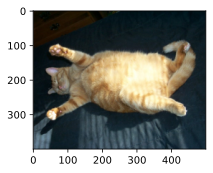

In [2]:
d2l.set_figsize()
img = d2l.Image.open('images/cat1.jpg')
d2l.plt.imshow(img);

In [3]:
# helper
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

### Flipping and Cropping

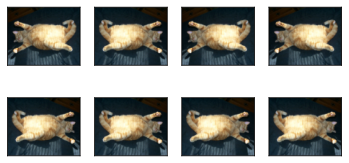

In [4]:
# flip an image left and right with a 50% chance
apply(img, torchvision.transforms.RandomHorizontalFlip())

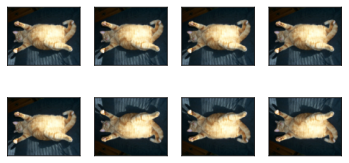

In [5]:
# flip an image up and down with a 50% chance
apply(img, torchvision.transforms.RandomVerticalFlip())

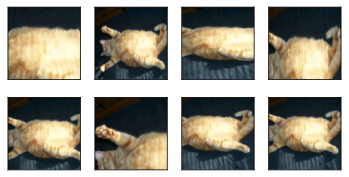

In [6]:
# we randomly crop an area 10% to 100% of area, width/height 0.5 to 1.0 and scale height and width to 200 px
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

### Changing Colors
- brightness
- contrast
- saturation
- hue

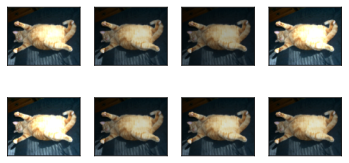

In [7]:
# we randomly change the brightness of the image to a value between 50% to 100%
apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0))

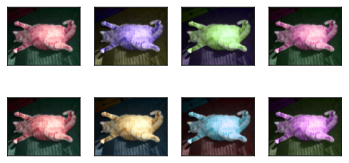

In [8]:
# changing hue
apply(img, torchvision.transforms.ColorJitter(
    brightness=0, contrast=0, saturation=0, hue=0.5))

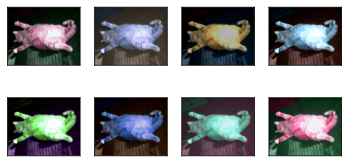

In [9]:
# changing brightness, contrast, saturation
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

### Combining Multiple Image Augmentation Methods

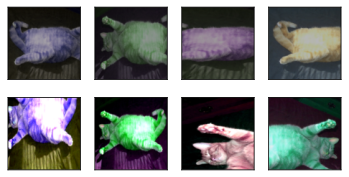

In [10]:
# Compose instance
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)